# Experiment 1: Linear Regression

In [1]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats

In [2]:
df = pd.read_csv("../../data/energy/df.csv", )
df.head()

,dom_id,pmt_id,pos_x,pos_y,pos_z,dir_x,dir_y,dir_z,tot,time,energy,label,group
0,1054,32658,-16.064,-76.599,112.441,0.000,0.955,-0.296,35,28449.0,13.415,1,1
1,1054,32671,-16.208,-76.707,112.611,-0.719,0.415,0.558,24,28450.0,13.415,1,1
2,1053,32639,-16.064,-76.624,122.011,0.000,0.830,0.558,12,28450.0,13.415,1,1
3,1054,32670,-16.064,-76.624,112.611,0.000,0.830,0.558,54,28450.0,13.415,1,1
4,1054,32664,-15.968,-76.625,112.559,0.478,0.827,0.296,47,28451.0,13.415,1,1


# Define target and predictors

In [20]:
y = df['energy']

X = df[['pos_x', 'pos_y', 'pos_z', 'time']]

# EDA

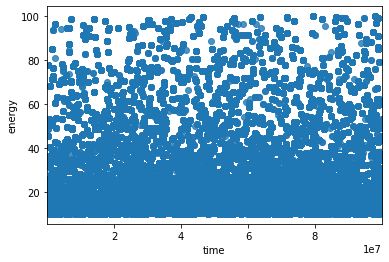

In [48]:
sns.regplot(x="time", y="energy", data=df);


In [49]:
from scipy.stats import pearsonr

In [57]:
pearsonr(df.energy, df.time)[0]

0.046969144210239684

In [52]:
pearsonr(df.energy, df.pos_x)

(0.010113898521928365, 1.4497558286914988e-12)

In [53]:
pearsonr(df.energy, df.pos_z)

(0.005138236087904894, 0.00032260838285526214)

In [54]:
pearsonr(df.energy, df.pos_y)

(0.019542628432696975, 1.3406264395811883e-42)

In [ ]:
pearsonr(df.energy, df.pos_y)

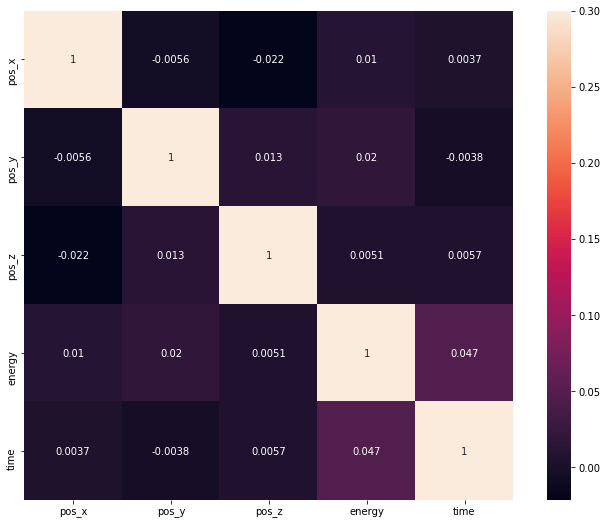

In [13]:
corr_matrix = df[['pos_x', 'pos_y', 'pos_z', 'energy', 'time']].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmax=0.3, annot=True, square=True)

plt.savefig("../../assets/energy/cm.jpg", dpi=600, bbox_inches='tight')

SKEW in Target Variable: 0.8826858180493037
PROBABILITY PLOT: 


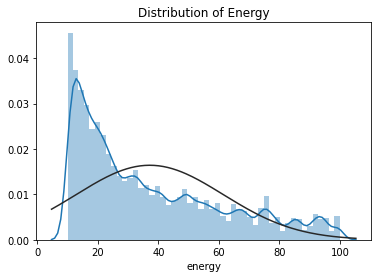

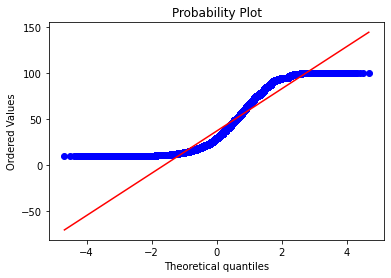

In [8]:
print("SKEW in Target Variable: {}".format(y.skew()))
print("PROBABILITY PLOT: ")
sns.distplot(y, fit=stats.norm).set_title("Distribution of Energy")
fig = plt.figure()
res = stats.probplot(y, plot=plt)

# Data Transformation

BoxCox returns best results.

SKEW in Target Variable after LOG TRANSFORMATION : 0.12230373536393746


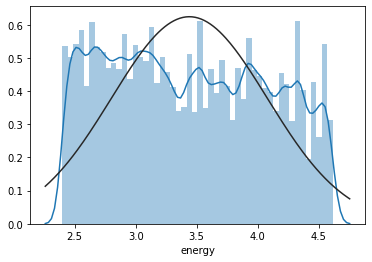

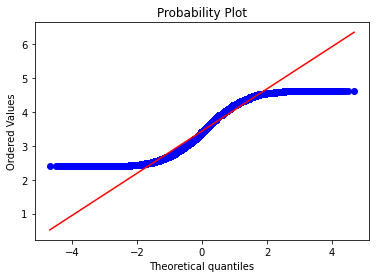

In [9]:
log_y = np.log1p(y)
log_y.skew()

print("SKEW in Target Variable after LOG TRANSFORMATION : {}".format(log_y.skew()))

sns.distplot(log_y , fit=stats.norm)
fig = plt.figure()
res = stats.probplot(log_y, plot=plt)

SKEW in Target Variable after SQUARE TRANSFORMATION : 0.4929017659165522


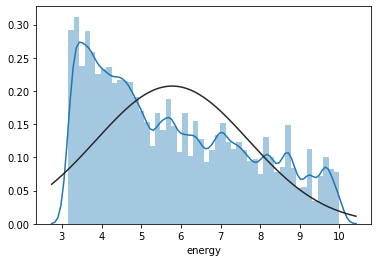

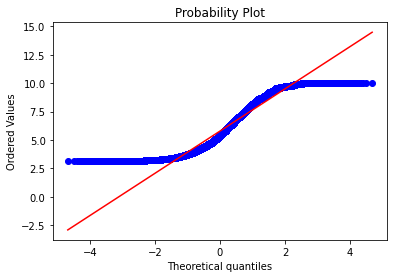

In [10]:
sq_y = np.sqrt(y)
sq_y.skew()
print("SKEW in Target Variable after SQUARE TRANSFORMATION : {}".format(sq_y.skew()))

sns.distplot(sq_y , fit=stats.norm)
fig = plt.figure()
res = stats.probplot(sq_y, plot=plt)

SKEW in Target Variable after BOXCOX TRANSFORMATION : 0.024214883060462995


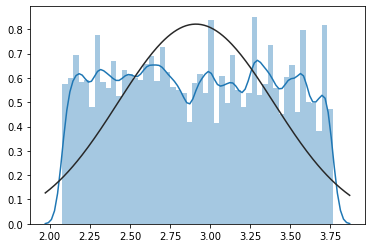

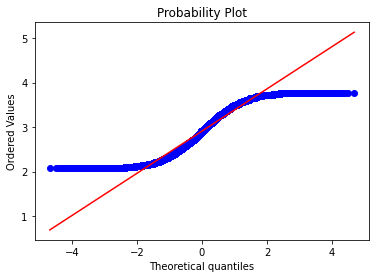

In [40]:
boxcox_y,_ = stats.boxcox(y)
boxcox_y = pd.Series(boxcox_y)
print("SKEW in Target Variable after BOXCOX TRANSFORMATION : {}".format(boxcox_y.skew()))

sns.distplot(boxcox_y , fit=stats.norm)
fig = plt.figure()
res = stats.probplot(boxcox_y,
                     dist=stats.norm,
                     plot=plt)

In [41]:
y = boxcox_y

# Split Dataset 

Dataset needs to be split into:
1. Main
    1. Train
    2. Test
2. Holdout for Testing on Unseen Data

Steps:
1. Identify Length of Dataset: `489906`
2. `90/10` Split for Main/Holdout Data
3. Save Last 10% as Holdout Data
    1. for `X`
    2. for `y`
4. Save first 90% as Main Data
    1. for `X`
    2. for `y`
5. `80/20` Train/Test Split on Main Data

In [13]:
# (1)
df_len = len(df)

# (2)
main_len = int(round(0.9 * df_len))
hold_len = df_len - main_len

# (3)
hold_X = X[-hold_len:]
hold_y = y[-hold_len:]

# (4)
X.drop(X.tail(hold_len).index, inplace=True)
y.drop(y.tail(hold_len).index, inplace=True) 

# (5)
train_len = int(round(0.8 * main_len))
test_len = main_len - train_len

# (6) Split the data into training/testing sets
X_train = X[:-train_len]
X_test = X[-test_len:]
y_train = y[:-train_len]
y_test = y[-test_len:]

print("DATASET LENGTH: {}".format(df_len))
print("MAIN DATASET LENGTH: {} \nHOLDOUT DATASET LENGHT: {}".format(main_len, hold_len))
print("TRAIN DATA LENGTH: {}".format(train_len))
print("TEST DATA LENGTH: {}".format(test_len))

DATASET LENGTH: 489906
MAIN DATASET LENGTH: 440915 
HOLDOUT DATASET LENGHT: 48991
TRAIN DATA LENGTH: 352732
TEST DATA LENGTH: 88183


/Users/shrutirao/Documents/Coding/Thesis/km3net/venv/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


# Model

In [14]:
regr = linear_model.LinearRegression()

regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

# Results

In [15]:
print('Coefficients: \n {}'.format(regr.coef_))

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))

print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 5.87027374e-04  9.30744128e-05 -3.26235455e-04  5.35525785e-03
  8.03718912e-03  2.33899463e-02  1.41544820e-03  6.76366380e-09
  0.00000000e+00]
Mean squared error: 0.41
Coefficient of determination: -0.69


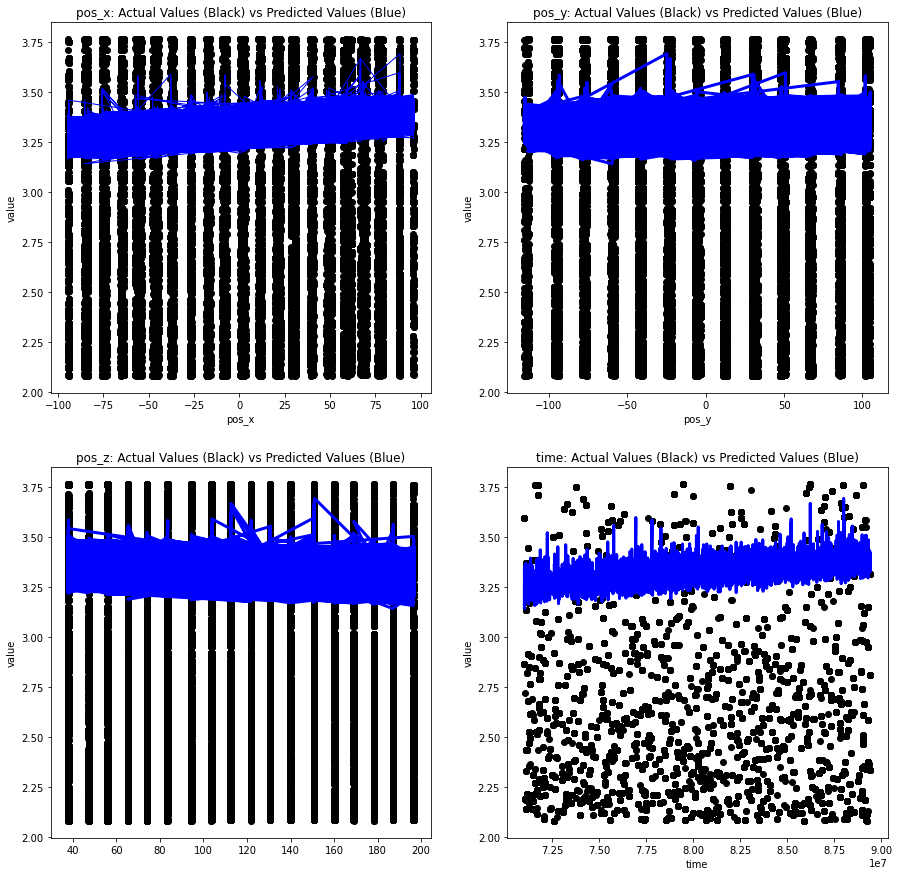

In [45]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,15))

ax1.scatter(X_test['pos_x'], y_test, label='pos_x',  color='black')
ax1.plot(X_test['pos_x'], y_pred, color='blue', linewidth=1)
ax1.set_xlabel("pos_x")
ax1.set_ylabel("value")
ax1.set_title("pos_x: Actual Values (Black) vs Predicted Values (Blue)")

ax2.scatter(X_test['pos_y'], y_test,  color='black')
ax2.plot(X_test['pos_y'], y_pred, color='blue', linewidth=3)
ax2.set_xlabel("pos_y")
ax2.set_ylabel("value")
ax2.set_title("pos_y: Actual Values (Black) vs Predicted Values (Blue)")

ax3.scatter(X_test['pos_z'], y_test,  color='black')
ax3.plot(X_test['pos_z'], y_pred, color='blue', linewidth=3)
ax3.set_label("pos_z")
ax3.set_ylabel("value")
ax3.set_title("pos_z: Actual Values (Black) vs Predicted Values (Blue)")

ax4.scatter(X_test['time'], y_test,  color='black')
ax4.plot(X_test['time'], y_pred, color='blue', linewidth=3)
ax4.set_xlabel("time")
ax4.set_ylabel("value")
ax4.set_title("time: Actual Values (Black) vs Predicted Values (Blue)")

plt.savefig("../../assets/energy/linear_regression.png")

# Save Model

In [19]:
filename = 'finalized_model.sav'
pickle.dump(regr, open(filename, 'wb'))

# Unseen Data

In [20]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

-0.6883391035577457


In [21]:
Xnew = hold_X
type(Xnew)

pandas.core.frame.DataFrame

In [237]:
for i in range(len(Xnew)):
    print(Xnew.iloc[1])
    break

pos_x   -8.347700e+01
pos_y   -2.187800e+01
pos_z    8.344100e+01
dir_x    8.270000e-01
dir_y    4.780000e-01
dir_z   -2.960000e-01
tot      3.400000e+01
time     8.940474e+07
label    1.000000e+00
Name: 440916, dtype: float64


In [22]:
ynew = loaded_model.predict(Xnew)

In [23]:
# for i in range(len(Xnew)):
#     print("Predicted Values: {} ".format(ynew[i]))

In [246]:
hold_y[:5]

440915    2.335711
440916    2.335711
440917    2.335711
440918    2.335711
440919    2.335711
dtype: float64

In [24]:
print('Coefficients: \n {}'.format(loaded_model.coef_))

print('Mean squared error: %.2f'
      % mean_squared_error(hold_y, ynew))

print('Coefficient of determination: %.2f'
      % r2_score(hold_y, ynew))

Coefficients: 
 [ 5.87027374e-04  9.30744128e-05 -3.26235455e-04  5.35525785e-03
  8.03718912e-03  2.33899463e-02  1.41544820e-03  6.76366380e-09
  0.00000000e+00]
Mean squared error: 0.46
Coefficient of determination: -0.90
